# Import Pandas


In [1]:
import pandas as pd

# Reading and Storing Files

In [21]:
filename = 'sample_data/student-por.csv'
studentData = pd.read_csv(filename, delimiter=';')
studentSmall = studentData.head()
outpath = 'sample_data/studentSmall.csv'
studentSmall.to_csv(outpath)

,age,address,famsize
0,18,U,GT3
1,17,U,GT3
2,15,U,LE3
3,15,U,GT3
4,16,U,GT3
...,...,...,...
644,19,R,GT3
645,18,U,LE3
646,18,U,GT3
647,17,U,LE3


# Converting types

In [23]:
studentData['Medu'] = studentData['Medu'].astype('float')
studentData.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4.0,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1.0,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1.0,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4.0,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3.0,3,other,other,...,4,3,2,1,2,5,0,11,13,13


# Data Selection

In [25]:
ageDf = studentData['age']
ageDf

0      18
1      17
2      15
3      15
4      16
       ..
644    19
645    18
646    18
647    17
648    18
Name: age, Length: 649, dtype: int64

In [28]:
studentSubset1 = studentData[['age', 'address', 'famsize']]
studentSubset1

,age,address,famsize
0,18,U,GT3
1,17,U,GT3
2,15,U,LE3
3,15,U,GT3
4,16,U,GT3
...,...,...,...
644,19,R,GT3
645,18,U,LE3
646,18,U,GT3
647,17,U,LE3


In [29]:
studentSubset2 = studentData.loc[:25, ['age', 'address', 'famsize']]
studentSubset2.shape

(26, 3)

# Data Transformation

In [32]:
studentData.groupby(['famsize'])['famsize'].agg('count')

famsize
GT3    457
LE3    192
Name: famsize, dtype: int64

# Data Visualization

In [34]:
aggData = studentData.groupby(['famsize'])['famsize'].agg('count')
aggData

famsize
GT3    457
LE3    192
Name: famsize, dtype: int64

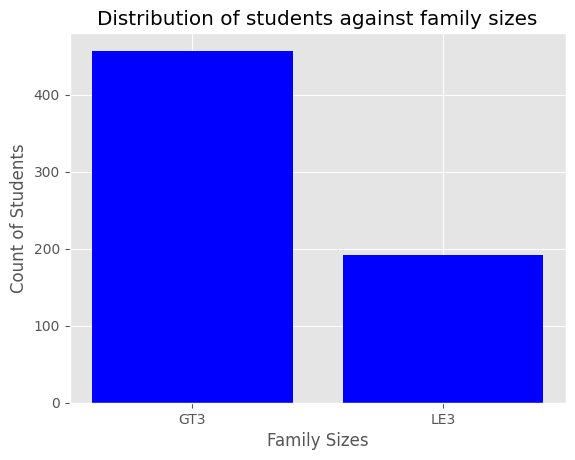

In [39]:
import matplotlib.pyplot as plt

y = aggData.values
x = list(aggData.index)
%matplotlib inline
plt.style.use('ggplot')

plt.bar(x, y, color='blue')
plt.xlabel('Family Sizes')
plt.ylabel('Count of Students')
plt.title('Distribution of students against family sizes')
plt.show()

# Time Series Data

In [43]:
date = pd.to_datetime('15th of January, 2021')
print(date)

2021-01-15 00:00:00


In [46]:
newdate = date + pd.to_timedelta(25, unit="D")
print(newdate)

2021-02-09 00:00:00


In [48]:
futureDate = pd.date_range(start=newdate, periods=7, freq="D")
futureDate

DatetimeIndex(['2021-02-09', '2021-02-10', '2021-02-11', '2021-02-12',
               '2021-02-13', '2021-02-14', '2021-02-15'],
              dtype='datetime64[ns]', freq='D')

# Code Optimization

In [49]:
def add5(x):
  return x + 5

df = studentData[['G1', 'G2', 'G3']].apply(add5)
df.head()

,G1,G2,G3
0,5,16,16
1,14,16,16
2,17,18,17
3,19,19,19
4,16,18,18


In [50]:
df = studentData[['G1', 'G2', 'G3']].apply(lambda x:x+5)
df.head()

,G1,G2,G3
0,5,16,16
1,14,16,16
2,17,18,17
3,19,19,19
4,16,18,18


# Utility

Random number generator

In [52]:
import numpy as np
np.random.normal(2.0, 1, 10)

array([3.20701526, 3.1384883 , 1.51816643, 4.19655625, 1.34919771,
       1.29041111, 2.24438061, 2.40737437, 2.69155152, 2.51614541])

List Comprehention

In [54]:
letters =[]
for letter in 'Pandas':
  letters.append(letter)

print(letters)

['P', 'a', 'n', 'd', 'a', 's']


In [55]:
letters = [letter for letter in 'Pandas']
print(letters)

['P', 'a', 'n', 'd', 'a', 's']


iloc

In [57]:
lst = [['C', 45],['A', 60],['A', 26],['C', 57],['C', 81]]
df = pd.DataFrame(lst, columns = ['Product', 'Sales'])
df

,Product,Sales
0,C,45
1,A,60
2,A,26
3,C,57
4,C,81


In [58]:
df.loc[:2, 'Sales']

0    45
1    60
2    26
Name: Sales, dtype: int64

In [59]:
df.iloc[3]

Product     C
Sales      57
Name: 3, dtype: object

In [60]:
df['Sales'].eq(45)

0     True
1    False
2    False
3    False
4    False
Name: Sales, dtype: bool

In [61]:
df[df['Sales'].eq(45)]

,Product,Sales
0,C,45
